## CUARTO ANÁLISIS SELECCIONANDO SÓLO LA TIPOLOGÍA PISOS, ACOTANDO DATOS Y ELIMINANDO OUTLIERS.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyod.models.knn import KNN

In [125]:
data = pd.read_csv("../outputs/house_fit.csv", index_col=0)

In [126]:
data.head()

,house_type_id,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
0,0,0,0,64.0,2,1.0,3.0,1,0,0,0,0,0,0,40.343263,-3.688352,85000
1,0,1,0,70.0,3,1.0,4.0,1,1,0,0,1,0,0,40.355109,-3.700105,129900
2,0,0,0,94.0,2,2.0,1.0,1,1,0,1,0,0,0,40.345539,-3.710970,144247
3,0,0,0,64.0,2,1.0,0.0,1,1,0,1,0,0,0,40.345539,-3.710970,109900
4,0,0,0,108.0,2,2.0,4.0,1,1,1,1,0,0,1,40.355841,-3.688399,260000


In [127]:
# Para este análisis, vamos a quedarnos sólo con la tipología piso.

data.house_type_id.value_counts()

0    15858
2      910
1      630
Name: house_type_id, dtype: int64

In [128]:
# La tipología pisos se corresponde con el valor 0 de la columna house_type_id, eliminamos los otros datos.

data = data.drop(data[data["house_type_id"]==1].index)
data = data.drop(data[data["house_type_id"]==2].index)

In [129]:
# Eliminamos ahora la columna house_type_id, ya que al sólo existir una tipología, ya no es necesaria.

data = data.drop("house_type_id", axis=1)

In [130]:
# Vamos a realizar ahora un análisis estadístico de los datos numéricos para ver como acotamos los mismos.

data.describe()

,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
count,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,15858.000000,1.585800e+04
mean,0.203998,0.057826,120.263085,2.868773,1.828415,2.529134,0.900366,0.765986,0.308299,0.327658,0.390907,0.163261,0.182873,40.423055,-3.688877,5.403210e+05
std,0.402980,0.233421,81.550413,1.214570,1.001548,1.989354,0.299521,0.423395,0.461805,0.469374,0.487969,0.369616,0.386575,0.035346,0.036565,5.901108e+05
min,0.000000,0.000000,16.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.339934,-3.828783,3.600000e+04
25%,0.000000,0.000000,70.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.397292,-3.708916,1.900000e+05
50%,0.000000,0.000000,95.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.424816,-3.693014,3.480000e+05
75%,0.000000,0.000000,140.000000,3.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.445414,-3.667970,6.366000e+05
max,1.000000,1.000000,894.000000,15.000000,14.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.520554,-3.546616,8.500000e+06


### Del anterior análisis, viendo donde se concentran la mayoría de los datos, vamos a realizar una selección lógica de datos.

In [131]:
data = data.drop(data[data["buy_price"]>1000000].index)
data = data.drop(data[data["m2"]<40].index)
data = data.drop(data[data["m2"]>200].index)
data = data.drop(data[data["n_rooms"]>3].index)
data = data.drop(data[data["n_bathrooms"]<1].index)
data = data.drop(data[data["n_bathrooms"]>3].index)

In [132]:
# Eliminamos los outliers

clf = KNN(contamination=0.5, method="largest", algorithm="auto")
clf.fit(data)
y_pred = clf.predict(data)
dropea = data[y_pred == 1]
data = data.drop(dropea.index)

In [133]:
# Vamos a analizar nuestra tabla resultante.

data.describe()

,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
count,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000,6322.000000
mean,0.171307,0.023094,78.952705,2.312876,1.329168,2.245887,0.881999,0.657703,0.214964,0.242012,0.347991,0.145207,0.139829,40.418367,-3.690081,281954.001582
std,0.376806,0.150214,22.866114,0.706954,0.490376,1.757125,0.322634,0.474516,0.410830,0.428335,0.476371,0.352338,0.346837,0.036486,0.038444,155558.278694
min,0.000000,0.000000,40.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.339934,-3.828783,85000.000000
25%,0.000000,0.000000,62.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.388788,-3.714187,159000.000000
50%,0.000000,0.000000,75.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.414115,-3.696293,239000.000000
75%,0.000000,0.000000,91.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.445414,-3.663700,370000.000000
max,1.000000,1.000000,177.000000,3.000000,3.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.520554,-3.546616,980000.000000


In [134]:
data.to_csv("../outputs/4_houses_bounded_and_no_outliers.csv")

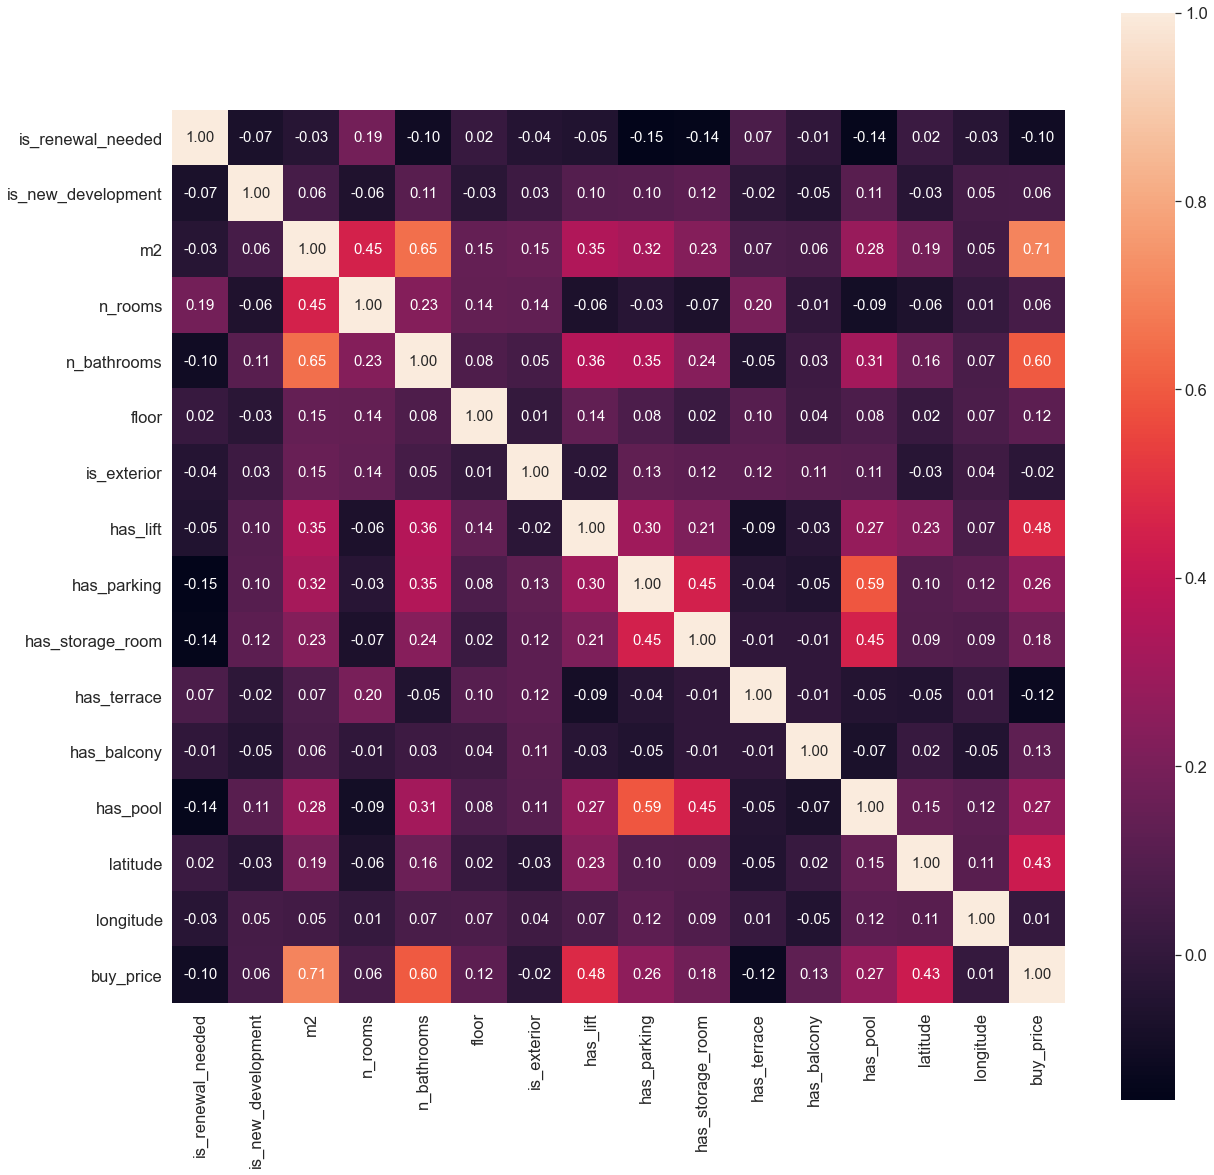

In [13]:
# Vamos a realizar un heatmap para ver la relación entre los datos.

cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                yticklabels=data.columns, xticklabels=data.columns)

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


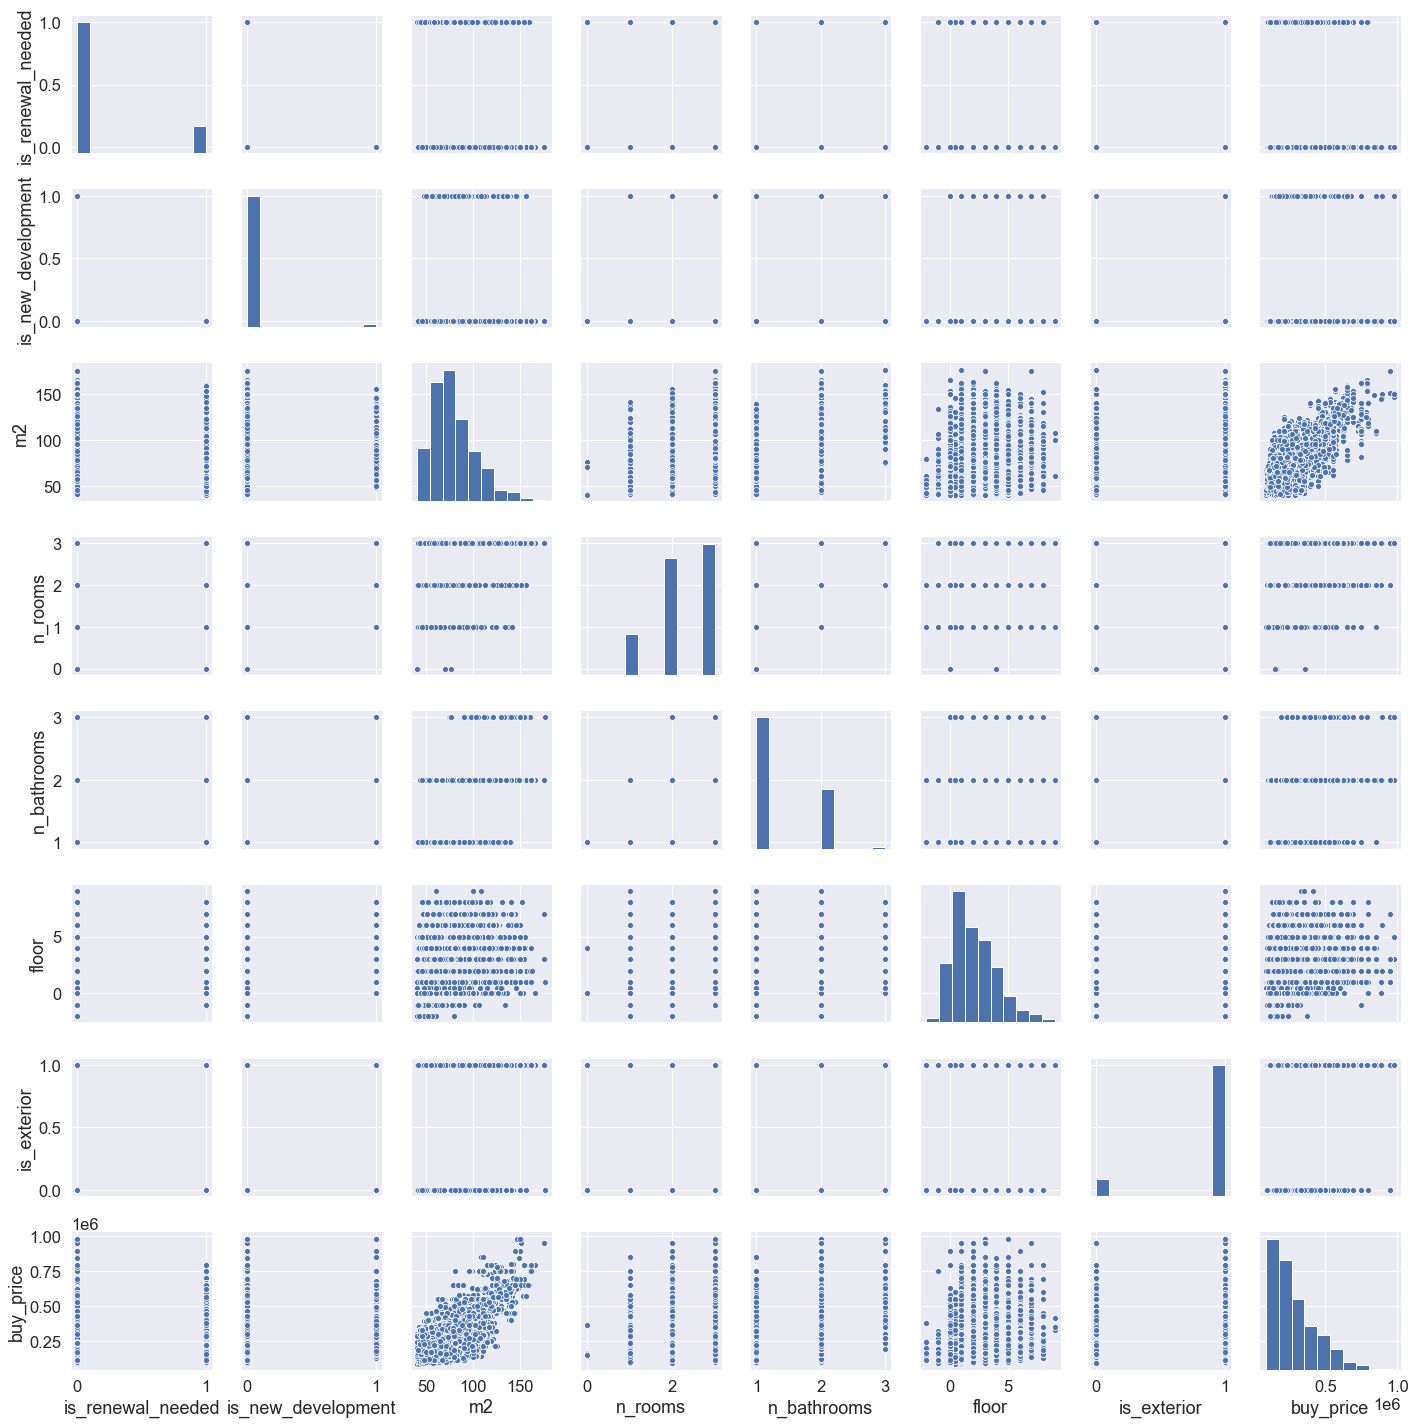

In [14]:
# Vamos a realizar ahora un pairplot para ver como se relacionan los datos entre sí.
# Como tenemos muchas features, vamos a dividirlas en dos análisis.

d_analysis_1 = data[["is_renewal_needed", "is_new_development","m2", "n_rooms",
                    "n_bathrooms", "floor", "is_exterior", "buy_price"]]

sns.pairplot(data, size=2.5, vars=d_analysis_1)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


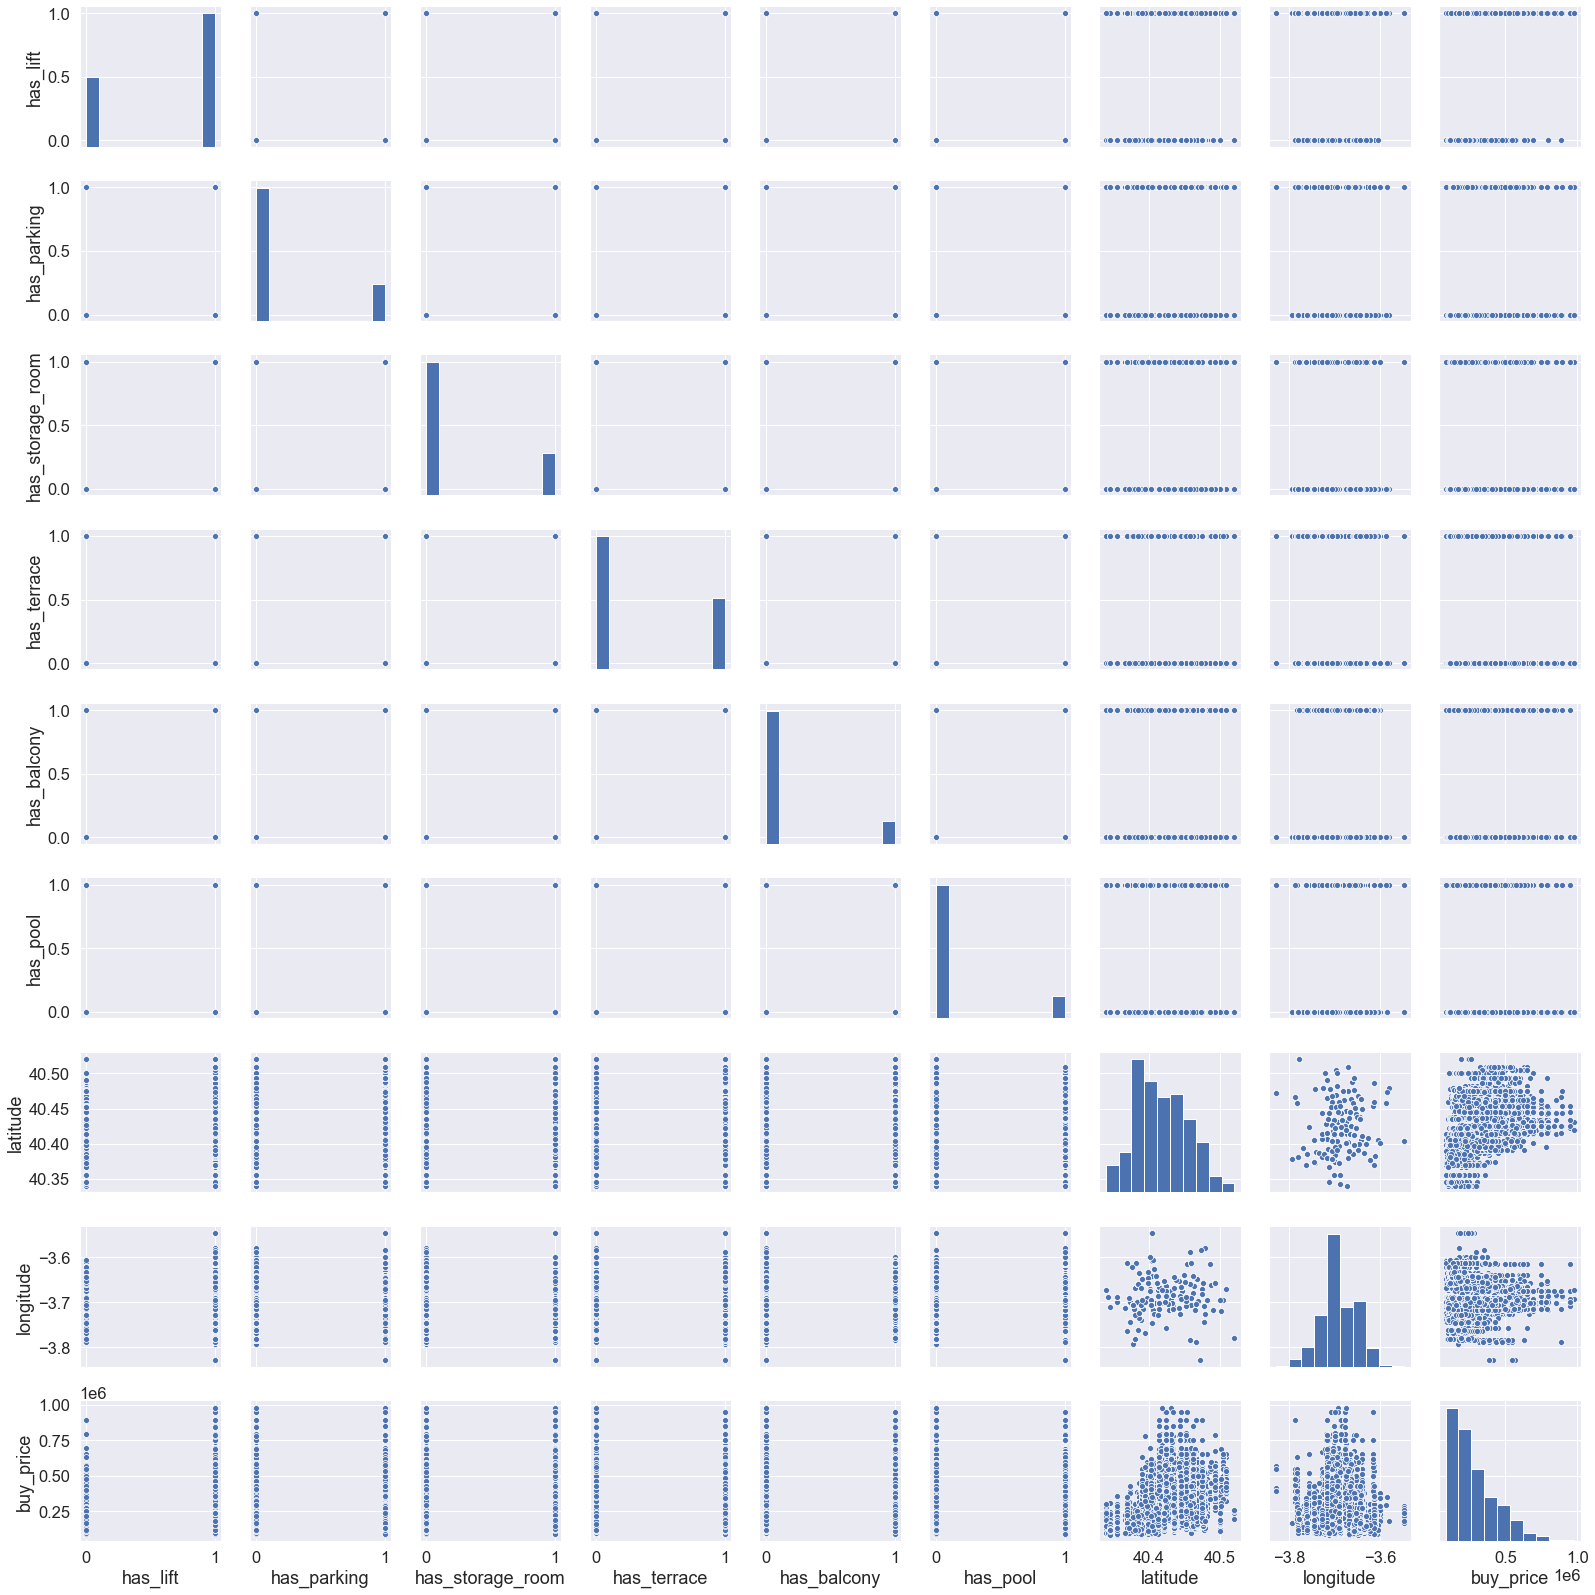

In [15]:
d_analysis_2 = data[["has_lift", "has_parking", "has_storage_room", "has_terrace",
              "has_balcony", "has_pool", "latitude", "longitude", "buy_price"]]

sns.pairplot(data, size=2.5, vars=d_analysis_2)
plt.tight_layout()

## Nos metemos ya de lleno con el entrenamiento de nuestro modelo.

### Empezaremos entrenando los datos con el módulo sklearn.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [17]:
X = data.drop(["buy_price"], axis=1)
y = data["buy_price"]

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [19]:
models = {"DecisionTree" : DecisionTreeRegressor(),
          "RandomForest": RandomForestRegressor(),
          "ExtraTrees" : ExtraTreesRegressor(),
          "GradientBoosting" : GradientBoostingRegressor(),
          "HistGradientBoosting": HistGradientBoostingRegressor(),
          "Voting": VotingRegressor(
              [('etr', ExtraTreesRegressor()),
               ('rf', RandomForestRegressor())]
          )
         }

In [20]:
# Entrenamos los datos

for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Entrenamiento finalizado")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Entrenamiento finalizado


-------DecisionTree-------
RMSE 60309.077
R2 0.839
-------RandomForest-------
RMSE 44222.077
R2 0.913
-------ExtraTrees-------
RMSE 46662.626
R2 0.903
-------GradientBoosting-------
RMSE 51232.467
R2 0.884
-------HistGradientBoosting-------
RMSE 44419.322
R2 0.913
-------Voting-------
RMSE 43617.638
R2 0.916


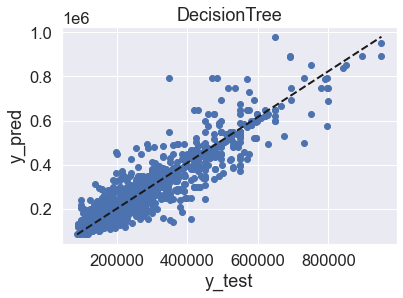

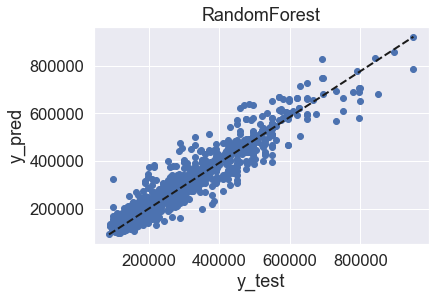

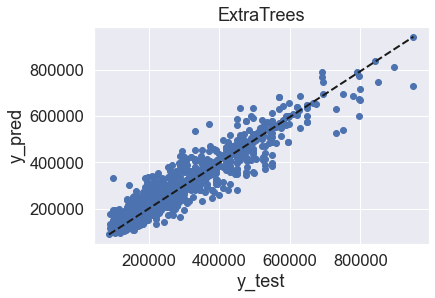

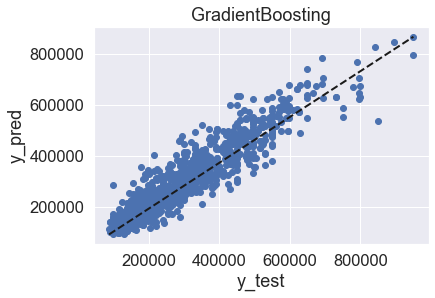

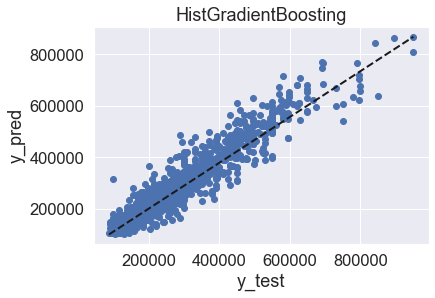

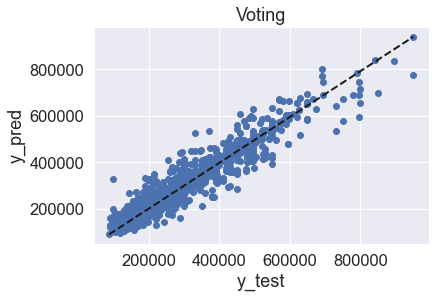

In [21]:
# Comprobamos el resultado de las métricas seleccionadas.

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")

In [22]:
# Aplicamos un crossvalidation para ver cual es el modelo que mejor funciona.

for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.47590311763481796
RandomForest accuracy0.7268931280116796
ExtraTrees accuracy0.7259623865268331
GradientBoosting accuracy0.7060002953503474
HistGradientBoosting accuracy0.779255487378205
Voting accuracy0.7426586461177367


In [23]:
# Como podemos comprobar, el modelo que mejores datos arroja de nuevo es VotingRegressor.
# Sin embargo los datos han empeorado drásticamente, el R2 es ahora de 0.916, y RMSE (43618 €) mejora pero debido 
# a que los datos de precios reales están más acotados.
# En este caso, el crossvalidation indica que el mejor modelo es el HistGradientBoosting.
# Vuelve a existir una gran dispersión en los datos.

### Vamos a entrenar nuestros datos con el módulo xgboost,  para ver si mejoran los resultados.

In [24]:
from xgboost import XGBRegressor

RMSE 43450.125
R2 0.916


Text(0, 0.5, 'y_pred')

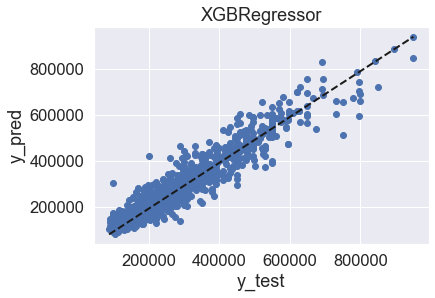

In [25]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print("R2", round(r2_score(y_test,y_pred),3))

# Ploteamos las gráficas.
plt.figure()
plt.title("XGBRegressor")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [26]:
# Los datos son prácticamente iguales al mejor de los modelos de sklearn.

### Vamos a entrenar ahora con el módulo H2O.

In [27]:
# Comprobamos ahora si con el módulo H2O podemos obtener aún mejores resultados.
# Vamos a trabajar con cuatro modelos:
    # H2OAutoML
    # H2ORandomForestEstimator.
    # H2OGradientBoostingEstimator.
    # H2OXGBoostEstimator.

In [28]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OXGBoostEstimator

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 33 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_Javi_lbrz9m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.257 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


#### H2OAutoML

In [29]:
h2train = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [30]:
X = list(data.drop(["buy_price"], axis=1))
y = "buy_price"

In [31]:
automl = H2OAutoML(max_runtime_secs=1200, sort_metric='RMSE')
automl.train(X, y, training_frame=h2train)
leader_board = automl.leaderboard
leader_board.head()

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,rmse,mean_residual_deviance,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201015_170434,41006.3,1.68152e+09,1.68152e+09,27769.4,0.145604
StackedEnsemble_BestOfFamily_AutoML_20201015_170434,41593.6,1.73003e+09,1.73003e+09,28218,0.147596
GBM_4_AutoML_20201015_170434,42787,1.83073e+09,1.83073e+09,29329,0.151656
XGBoost_grid__1_AutoML_20201015_170434_model_41,42948.3,1.84455e+09,1.84455e+09,29082.9,0.154215
XGBoost_grid__1_AutoML_20201015_170434_model_6,42996.9,1.84873e+09,1.84873e+09,29543.6,0.152301
GBM_1_AutoML_20201015_170434,43038.8,1.85233e+09,1.85233e+09,29906,0.152427
GBM_3_AutoML_20201015_170434,43121.5,1.85947e+09,1.85947e+09,29894,0.15177
XGBoost_grid__1_AutoML_20201015_170434_model_68,43123.3,1.85962e+09,1.85962e+09,29602.1,0.151775
XGBoost_grid__1_AutoML_20201015_170434_model_62,43137.2,1.86082e+09,1.86082e+09,29700.1,0.154838
GBM_grid__1_AutoML_20201015_170434_model_24,43181.8,1.86466e+09,1.86466e+09,29707.2,0.153349


#### Importamos ahora el csv para trabajar con el resto de modelos.

In [32]:
data = h2o.import_file("../outputs/4_houses_bounded_and_no_outliers.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [33]:
data.describe()

Rows:6322
Cols:17




,C1,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
type,int,int,int,int,int,int,real,int,int,int,int,int,int,int,real,real,int
mins,1.0,0.0,0.0,40.0,0.0,1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.3399339,-3.828782660082677,85000.0
mean,8327.698354950964,0.17130654856058208,0.023093957608351787,78.95270484024043,2.312875672255615,1.329167984814932,2.2458873774122114,0.8819993672888327,0.6577032584625119,0.21496361910787726,0.24201202151217968,0.34799114204365705,0.14520721290730781,0.13982916798481493,40.41836718049403,-3.690080538501613,281954.00158177793
maxs,17396.0,1.0,1.0,177.0,3.0,3.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40.5205538,-3.5466159,980000.0
sigma,5069.265259931835,0.37680641389166336,0.1502138338669749,22.866114168068986,0.7069537226265348,0.49037588190380943,1.75712521359898,0.3226343884084342,0.4745158568688815,0.41082959845575207,0.4283354106641788,0.4763708663036877,0.35233750111122736,0.3468371374595342,0.03648554752538609,0.038443584576680505,155558.27869383412
zeros,0,5239,6176,0,4,0,789,746,2164,4963,4792,4122,5404,5438,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,1.0,0.0,70.0,3.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.3551089,-3.7001047141537535,129900.0
1,3.0,0.0,0.0,64.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,40.3455389,-3.7109697,109900.0
2,4.0,0.0,0.0,108.0,2.0,2.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,40.3558406,-3.688398889638639,260000.0


In [34]:
X = data.col_names[1:-1]
y = data.col_names[-1]

train, test =data.split_frame([0.8], seed=1234)
train.shape, test.shape

((5080, 17), (1242, 17))

#### H2ORandomForestEstimator

In [35]:
rf_h2o = H2ORandomForestEstimator()
rf_h2o.train(X, y, training_frame=train)
print(rf_h2o)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602768662645_13


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,1677405.0,20.0,20.0,20.0,2559.0,2757.0,2664.84




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 2079952001.4301713
RMSE: 45606.4907817974
MAE: 29979.83843126691
RMSLE: 0.1587044383872247
Mean Residual Deviance: 2079952001.4301713

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 17:22:10,0.002 sec,0.0,NaN,NaN,NaN
1,,2020-10-15 17:22:10,0.092 sec,1.0,71814.041355,44076.867137,5.157257e+09
2,,2020-10-15 17:22:10,0.139 sec,2.0,69939.860887,42945.696031,4.891584e+09
3,,2020-10-15 17:22:10,0.184 sec,3.0,66449.120627,41526.334758,4.415486e+09
4,,2020-10-15 17:22:10,0.231 sec,4.0,64088.199317,40136.467340,4.107297e+09
5,,2020-10-15 17:22:10,0.277 sec,5.0,62384.532042,39288.413133,3.891830e+09
6,,2020-10-15 17:22:10,0.326 sec,6.0,59924.706188,37793.646221,3.590970e+09
7,,2020-10-15 17:22:10,0.372 sec,7.0,57936.099085,37108.652733,3.356592e+09
8,,2020-10-15 17:22:11,0.418 sec,8.0,56486.745890,36475.053594,3.190752e+09
9,,2020-10-15 17:22:11,0.449 sec,9.0,55144.646381,35693.041094,3.040932e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,1.499157e+15,1.000000,0.328352
1,latitude,1.006019e+15,0.671057,0.220343
2,n_bathrooms,9.098988e+14,0.606940,0.199290
3,longitude,3.720941e+14,0.248202,0.081498
4,has_lift,3.289275e+14,0.219408,0.072043
5,floor,1.154823e+14,0.077031,0.025293
6,n_rooms,8.055079e+13,0.053731,0.017643
7,has_pool,7.109174e+13,0.047421,0.015571
8,has_parking,4.516033e+13,0.030124,0.009891
9,has_terrace,3.262854e+13,0.021765,0.007146


In [36]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(rf_h2o.rmse(),3))
print("R2: ", round(rf_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", rf_h2o.model_performance(test).rmse())
print("R2: ", rf_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  45606.491
R2:  0.914
-------test metrics-------
RMSE:  46838.10686329612
R2:  0.9084100963133308


In [37]:
# Como podemos observar, los datos están muy ajustados.
# Sin embargo el R2 es muy bajo.

In [38]:
predict = rf_h2o.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


RMSE:  46838.10686329612
R2:  0.9084100963133308


Text(0, 0.5, 'y_pred')

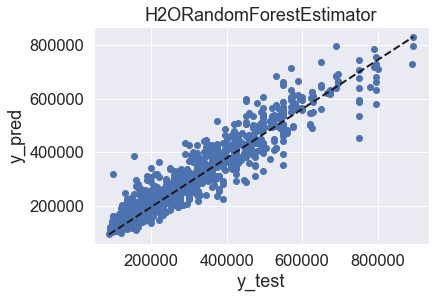

In [39]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", rf_h2o.model_performance(test, predict).rmse())
print("R2: ", rf_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2ORandomForestEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [40]:
# Existe mucha dispersión.

In [41]:
print(predict, test[-1])

predict
169236
106220
227176
224933
240820
226718
254761
260002
139840
178948


buy_price
118000
100000
210000
140000
220000
210000
245000
235000
138000
155000


#### H2OGradientBoostingEstimator

In [42]:
gbm_h2o = H2OGradientBoostingEstimator()
gbm_h2o.train(X, y, training_frame=train)
print(gbm_h2o)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1602768662645_14


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,21161.0,5.0,5.0,5.0,17.0,32.0,28.98




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1799402203.9555433
RMSE: 42419.361192214375
MAE: 30296.613525775098
RMSLE: 0.1508863060423678
Mean Residual Deviance: 1799402203.9555433

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 17:23:17,0.004 sec,0.0,155733.646891,124670.776257,2.425297e+10
1,,2020-10-15 17:23:17,0.030 sec,1.0,143826.619379,115273.068910,2.068610e+10
2,,2020-10-15 17:23:17,0.041 sec,2.0,133470.345644,106922.884756,1.781433e+10
3,,2020-10-15 17:23:17,0.051 sec,3.0,124189.386782,99241.346371,1.542300e+10
4,,2020-10-15 17:23:17,0.060 sec,4.0,115929.990698,92552.602799,1.343976e+10
5,,2020-10-15 17:23:17,0.069 sec,5.0,108005.174192,85908.208781,1.166512e+10
6,,2020-10-15 17:23:17,0.078 sec,6.0,101215.535482,80178.576455,1.024458e+10
7,,2020-10-15 17:23:17,0.087 sec,7.0,95351.741951,75242.087340,9.091955e+09
8,,2020-10-15 17:23:17,0.097 sec,8.0,89862.709266,70607.355629,8.075307e+09
9,,2020-10-15 17:23:17,0.107 sec,9.0,85073.270008,66465.899145,7.237461e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,2.779414e+14,1.000000,0.462975
1,latitude,1.421825e+14,0.511556,0.236838
2,n_bathrooms,7.007592e+13,0.252125,0.116728
3,longitude,5.191225e+13,0.186774,0.086472
4,has_lift,2.813928e+13,0.101242,0.046872
5,n_rooms,8.551789e+12,0.030768,0.014245
6,has_pool,7.665600e+12,0.027580,0.012769
7,floor,5.513257e+12,0.019836,0.009184
8,has_parking,2.480061e+12,0.008923,0.004131
9,is_renewal_needed,2.105935e+12,0.007577,0.003508


In [43]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(gbm_h2o.rmse(),3))
print("R2: ", round(gbm_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", gbm_h2o.model_performance(test).rmse())
print("R2: ", gbm_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  42419.361
R2:  0.926
-------test metrics-------
RMSE:  50308.96947728107
R2:  0.8943329023528614


In [44]:
# Como podemos observar, los datos están bastante ajustados, existiendo algo de overfitting.
# Sin embargo el R2 es muy bajo.

In [45]:
predict = gbm_h2o.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


RMSE:  50308.96947728107
R2:  0.8943329023528614


Text(0, 0.5, 'y_pred')

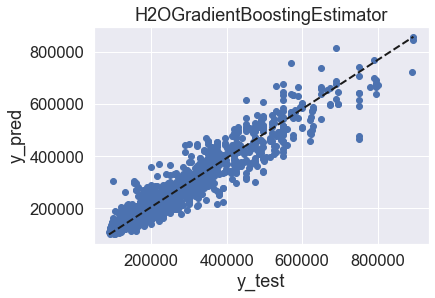

In [46]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", gbm_h2o.model_performance(test, predict).rmse())
print("R2: ", gbm_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2OGradientBoostingEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [47]:
# Existe mucha dispersión.

In [48]:
print(predict, test[-1])

predict
143253
108706
237904
197877
222319
232734
251194
257024
140589
177172


buy_price
118000
100000
210000
140000
220000
210000
245000
235000
138000
155000


#### H2OXGBoostEstimator

In [49]:
xgbm_h2o = H2OXGBoostEstimator()
xgbm_h2o.train(X, y, training_frame=train)
print(xgbm_h2o)

xgboost Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1602768662645_15


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 779782549.2421608
RMSE: 27924.586823123467
MAE: 19838.9833738312
RMSLE: 0.11017412000799258
Mean Residual Deviance: 779782549.2421608

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 17:27:15,0.032 sec,0.0,321766.061304,281567.806102,1.035334e+11
1,,2020-10-15 17:27:15,0.107 sec,1.0,231395.373584,197791.271697,5.354382e+10
2,,2020-10-15 17:27:15,0.147 sec,2.0,168471.656203,139116.610024,2.838270e+10
3,,2020-10-15 17:27:15,0.205 sec,3.0,125187.147123,98402.907989,1.567182e+10
4,,2020-10-15 17:27:15,0.257 sec,4.0,95632.449097,71166.989133,9.145565e+09
5,,2020-10-15 17:27:15,0.321 sec,5.0,76173.675765,54159.452156,5.802429e+09
6,,2020-10-15 17:27:15,0.364 sec,6.0,63118.743171,43838.242018,3.983976e+09
7,,2020-10-15 17:27:15,0.421 sec,7.0,55220.638547,38009.467863,3.049319e+09
8,,2020-10-15 17:27:15,0.447 sec,8.0,49827.083973,34333.869219,2.482738e+09
9,,2020-10-15 17:27:15,0.463 sec,9.0,46071.801774,32057.899203,2.122611e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,1.091001e+14,1.000000,0.482675
1,latitude,5.157287e+13,0.472712,0.228166
2,n_bathrooms,2.149140e+13,0.196988,0.095081
3,longitude,2.080867e+13,0.190730,0.092061
4,has_lift,1.173513e+13,0.107563,0.051918
5,floor,3.215072e+12,0.029469,0.014224
6,n_rooms,2.420419e+12,0.022185,0.010708
7,has_pool,2.216412e+12,0.020315,0.009806
8,is_renewal_needed,8.980629e+11,0.008232,0.003973
9,has_parking,8.940291e+11,0.008195,0.003955


In [50]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(xgbm_h2o.rmse(),3))
print("R2: ", round(xgbm_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", xgbm_h2o.model_performance(test).rmse())
print("R2: ", xgbm_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  27924.587
R2:  0.968
-------test metrics-------
RMSE:  47344.59832208118
R2:  0.9064185416899342


In [51]:
# Como podemos observar, hay mucho overfittig.
# El R2 es muy bajo.

In [52]:
predict = xgbm_h2o.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


RMSE:  47344.59832208118
R2:  0.9064185416899342


Text(0, 0.5, 'y_pred')

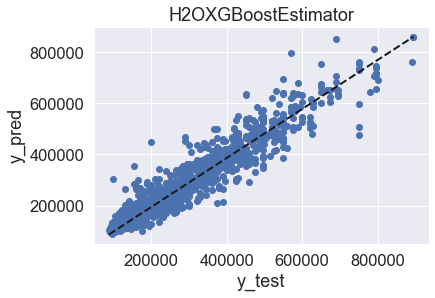

In [53]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", xgbm_h2o.model_performance(test, predict).rmse())
print("R2: ", xgbm_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2OXGBoostEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [54]:
# Existe mucha dispersión.

In [55]:
print(predict, test[-1])

predict
99205
99178.8
209347
219617
238018
227798
244301
231687
131133
150079


buy_price
118000
100000
210000
140000
220000
210000
245000
235000
138000
155000


In [56]:
# En este test, nos vamos a quedar con RandomForestRegressor, que parece ser el modelo más equilibrado y
# que más se ajusta a la realidad.

## Tasación manual.

In [115]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sklearn import preprocessing

In [116]:
vivienda = {'neighborhood_id': "Malasaña-Universidad, Centro(Madrid)",
            'is_renewal_needed': True,    
            'is_new_development': False, 
            'm2': 90,        
            'n_rooms': 2,                 
            'n_bathrooms': 2,            
            'floor': 2,              
            'is_exterior': True,
            'has_lift': True,             
            'has_parking': True,
            'has_storage_room': True,
            'has_terrace': True,
            'has_balcony': True,
            'has_pool': True                      
           }

In [117]:
geolocator = Nominatim(user_agent="http")

locate = geolocator.geocode(vivienda["neighborhood_id"], timeout=7)
vivienda["latitude"] = int(locate.latitude)
vivienda["longitude"] = int(locate.longitude)

In [118]:
vivienda.pop("neighborhood_id")

'Malasaña-Universidad, Centro(Madrid)'

In [119]:
piso = pd.DataFrame.from_dict(vivienda, orient='index').T
piso

,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude
0,True,False,90,2,2,2,True,True,True,True,True,True,True,40,-3


In [120]:
def transf(column):

    le = preprocessing.LabelEncoder()
    piso[column] = le.fit_transform(piso[column])
    return piso[column]

In [121]:
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool");

In [122]:
piso = piso.astype(float)

In [123]:
estimated_price = xgbr.predict(piso)
print(estimated_price)

[140430.42]


## En este cuarto análisis, tal y como hemos podido comprobar, nuestro resultados empeoran drásticamente, sólo hay que ver el precio predecido para el nuevo piso.
## Vamos a realizar un último análisis acotando los datos en los puntos más concentrados y vamos a eliminar outliers en dos ocasiones para ver si nuestros resultados mejoran.